In [ ]:
pip install pykrige


In [ ]:
import numpy as np

# Define grid
grid_lon = np.arange(100.119736916, 104.324765220, 0.09)
grid_lat = np.arange(1.255854330,6.721694625, 0.09)

metadata = {
    'API_18': 
    {
        'data_source': 'PreparedDataSet\\API_18.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 25,
        'sill' : 43
    },
    'API_19': # havent tune
    {
        'data_source': 'PreparedDataSet\\API_19.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 35,
        'sill' : 60
    },
    'Temp_18':
    {
        'data_source': 'PreparedDataSet\\Meteo_18.csv',
        'variogram_model': 'spherical',
        'range' : 1,
        'nugget' : 3,
        'sill' : 30
    },
    'Temp_19': 
    {
        'data_source': 'PreparedDataSet\\Meteo_19.csv',
        'variogram_model': 'spherical',
        'range' : 1,
        'nugget' : 3,
        'sill' : 30
    },
    'Humidity_18': 
    {
        'data_source': 'PreparedDataSet\\Meteo_18.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 10,
        'sill' : 85
    },
    'Humidity_19': 
    {
        'data_source': 'PreparedDataSet\\Meteo_19.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 10,
        'sill' : 85
    },
    'Precip_18': # havent tune
    {
        'data_source': 'PreparedDataSet\\Meteo_18.csv',
        'variogram_model': 'spherical',
        'range' : 1,
        'nugget' : 3,
        'sill' : 30
    },
    'Precip_19': # havent tune
    {
        'data_source': 'PreparedDataSet\\Meteo_19.csv',
        'variogram_model': 'spherical',
        'range' : 1,
        'nugget' : 3,
        'sill' : 30
    },
    'Wind_18': # havent tune
    {
        'data_source': 'PreparedDataSet\\Meteo_18.csv',
        'variogram_model': 'spherical',
        'range' : 1,
        'nugget' : 3,
        'sill' : 30
    },
    'Wind_19': # havent tune
    {
        'data_source': 'PreparedDataSet\\Meteo_19.csv',
        'variogram_model': 'spherical',
        'range' : 1,
        'nugget' : 3,
        'sill' : 30
    },
    'Vegetation_18': # havent tune
    {
        'data_source': 'PreparedDataSet\\Vegetation_1819.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 25,
        'sill' : 43
    },
    'Vegetation_19': # havent tune
    {
        'data_source': 'PreparedDataSet\\Vegetation_1819.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 25,
        'sill' : 43
    },
    'Traffic_18': # havent tune
    {
        'data_source': 'PreparedDataSet\\Traffic_1819.csv',
        'variogram_model': 'spherical',
        'range' : 1.5,
        'nugget' : 25,
        'sill' : 43
    },
}

In [101]:
import pandas as pd

data = 'Precip_18'

# Read the CSV file
df = pd.read_csv(metadata[data]['data_source'])

for attribute in df.columns:
    print(attribute)
    
while True:
    target = input('Please set your target variable: ')
    if target in df.columns:
        break
    else:
        print('Please enter a valid target variable')


# Extract columns
lon = df['longitude'].values          # lon/ longitude
lat = df['latitude'].values          # lat/ latitude
target = df[target].values

Unnamed: 0
name
longitude
latitude
temp
humidity
precip
windspeed


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 8
Full Sill: 9
Range: 2
Nugget: 1 



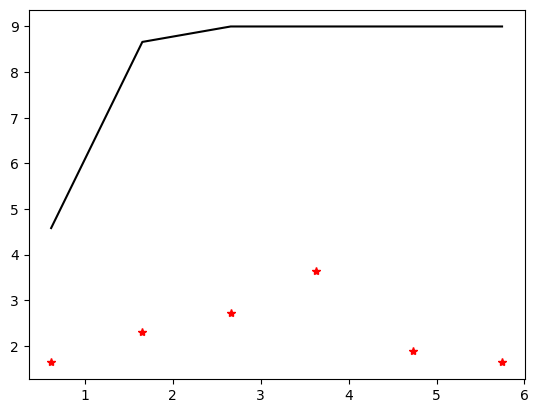

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

(61, 47)


In [102]:
from pykrige.ok import OrdinaryKriging

OK = OrdinaryKriging(lon, lat, target, variogram_model='spherical', enable_plotting=True, verbose=True
                     ,variogram_parameters={'range': 2, 'nugget': 1, 'sill': 9})
# OK = OrdinaryKriging(lon, lat, target, 
#                      variogram_model= metadata[data]['variogram_model'] , enable_plotting=True, verbose=True,
#                      variogram_parameters={'range': metadata[data]['range'], 'nugget': metadata[data]['nugget'], 'sill': metadata[data]['sill']})


# Range: the distance beyond which points are not correlated; AKA the spread of influence of each point
# Nugget: the y-intercept of the variogram; AKA the measurement error
# Sill: the maximum variance possible; AKA the measurement variance plus the nugget

z_interp, ss = OK.execute('grid', grid_lon.flatten(), grid_lat.flatten())
print(z_interp.shape)

Text(0.5, 1.0, 'Kriging Interpolation (spherical) for Precip_18 in West Malaysia')

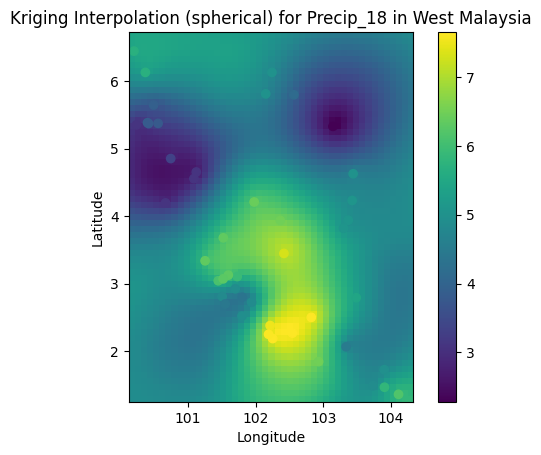

In [103]:
# Check and tune

from matplotlib import pyplot as plt


cax = plt.imshow(z_interp, extent=(100.119736916, 104.324765220, 1.255854330,6.721694625), origin='lower')
plt.scatter(lon, lat, c=target)
plt.colorbar(cax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Kriging Interpolation ({metadata[data]['variogram_model']}) for {data} in West Malaysia')


INTERPOLATION automation


In [ ]:
import pandas as pd

# Convert z_interp to a dataframe
df_z_interp = pd.DataFrame(z_interp)
print(df_z_interp.shape)

# Flip dataframe vertically
df_z_interp = df_z_interp.iloc[::-1]

In [ ]:
# To run R in Jupyter Notebook
%load_ext rpy2.ipython

In [ ]:
%R -i df_z_interp   # Pass the dataframe to R
%R -i data                  # Pass the data name to R

In [ ]:
%%R
# automate insert columns of data from df_z_interp into one column in target dataframe
target2867Structure_file = read.csv('QGIS\\StructureGrid\\2867_holdplace.csv')
hold_data = data.frame()
for (i in 1:47){
  for ( j in 1:61){
    hold_data = rbind(hold_data, df_z_interp[j,i])
  }
}
done = data.frame()
done = cbind(target2867Structure_file, hold_data)
colnames(done)[8] = data

filename = paste('z_interp\\z_interp_', data, '.csv', sep = '')
write.csv(done, filename, row.names = FALSE)

In [ ]:
####
####
#!!!! only run this once to create the final superset csv file
####
####
# SUPERSET
import shutil
source_file = 'QGIS\\Result\\StructureGrid\\966_targetGrid.csv'
destination_file = 'FinalSuperset\\FinalSuperset.csv'
shutil.copyfile(source_file, destination_file)

GO to QGIS
<br><br>
Import z_interp file to QGIS
<br>
<img src="asset\Import_Z_interp.png" alt="alt text" width="500" height="300">
<br><br>
Create Grid based on West Malaysia shapefile (more info, contact me)
<br>
<img src="asset\Create_Grid.png" alt="alt text" width="500" height="300">
<br><br>
Clip the grid to west malaysia
<br>
<img src="asset\Clip_gridToWestMalaysia.png" alt="alt text" width="500" height="300">
<br><br>
Join attribute By Location
<br>
<img src="asset\JoinAttrByLocation.png" alt="alt text" width="500" height="300">
<br><br>
Export the layer as grided_{data}
<br>
<img src="asset\export_Grided.png" alt="alt text" width="500" height="300">
<br><br>
Brief showcase of the four layer, (not including gradien color)
<br>
<img src="asset\briefShowcase.gif" alt="alt text" width="500" height="300">

In [ ]:
%%R
library(dplyr)
# grouping QGIS result into 966 grids/ records
filename = paste('QGIS\\Result\\grided_', data, '.csv', sep = '')
grided_target = read.csv(filename)

grided_target <- grided_target %>% 
    group_by(id, left, top, right, bottom, row_index, col_index) %>% 
    summarize(!!data := mean(!!sym(data)))

# Write the new dataframe to final supeset csv file
superset = read.csv('FinalSuperset\\FinalSuperset.csv')
last_column = ncol(grided_target)
superset = cbind(superset, grided_target[,last_column])
write.csv(superset, 'FinalSuperset\\FinalSuperset.csv', row.names = FALSE)
